<a href="https://colab.research.google.com/github/GYVVishnu77/AICTE--Internship/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E-Waste Image Classification Using EfficientNetV2B0 (Transfer Learning)
##Problem Statement

E-waste is a growing environmental and health concern globally. Manual sorting is inefficient, error-prone, and labor-intensive. This project aims to automate the classification of e-waste using deep learning, enabling accurate categorization to improve recycling and disposal.

###Objective
Build an image classifier using EfficientNetV2B0 to categorize e-waste into 10 distinct classes, supporting smarter recycling systems.

##Dataset Overview
###Name: E-Waste Image Dataset

###Source: [Kaggle Dataset]( https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset)

###Classes (10):
- PCB
- Player
- Battery
- Microwave
- Mobile
- Mouse
- Printer
- Television
- Washing Machine
- Keyboard.



##What is Transfer Learning?
A technique where a pre-trained model (e.g., on ImageNet) is reused for a related task, saving time and improving performance — especially when data is limited.

###Benefits:
- Faster training
- Leverages rich, learned features
- High accuracy even with smaller datasets

###Process:
- Load pre-trained model (EfficientNetV2B0)
- Freeze or fine-tune layers
- Add custom layers
- Train on the e-waste dataset

##Why EfficientNetV2B0?

- Lightweight: Small size, mobile-friendly
- Fast: Quick to train and infer
- Pretrained: On ImageNet for strong feature extraction

###Accuracy: Excellent performance in resource-constrained environments

##Core Libraries
- TensorFlow: Model building & training
- NumPy: Numerical operations
- Matplotlib: Visualization of results

By working on google colab, there is no need for downloading any libraries or modules and we can proceed to import our requirements.

In [3]:
import tensorflow as tf  # Core TensorFlow library
from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks
from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models
from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning
from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet
import numpy as np  # Numerical operations and array handling
import matplotlib.pyplot as plt  # Plotting graphs and images
import seaborn as sns  # Plotting graphs and images
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models
import gradio as gr  # Web interface library to deploy and test ML models
from PIL import Image  # For image file loading and basic image operations
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- `Train/`: Images used for training the model  
- `Test/`: Images used for model evaluation  
- `Validation/`: Images used to fine-tune and validate the model

In [4]:
testpath= '/content/drive/My Drive/test'
trainpath= '/content/drive/My Drive/train'
validpath = '/content/drive/My Drive/val'

### Load image dataset using  the tool `image_dataset_from_directory`.
### Split data into training, validation, and testing sets.

`tf.keras.utils.image_dataset_from_directory(...)`  
Used to load images from a directory where each subfolder represents a class.

In [5]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 30, validation_split= False)

Found 2410 files belonging to 10 classes.


In [6]:
datatest= tf.keras.utils.image_dataset_from_directory(testpath,shuffle = True, image_size = (128,128), batch_size = 30, validation_split= False)

Found 300 files belonging to 10 classes.


In [7]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 30, validation_split= False)

Found 300 files belonging to 10 classes.


Now, the data has been imported from the google drive to google colab. It has been segregated into training, testing and validation datasets.

In [8]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


From  here, we are confirming the number of classes in each dataset and their names.

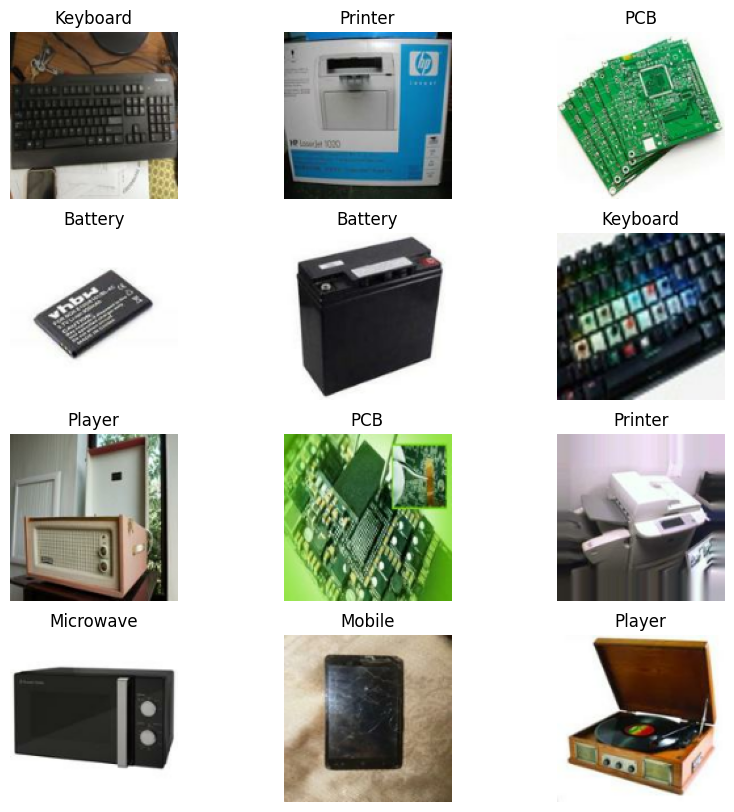

In [9]:
# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")

According to the datatrain variable, dataset are divided into mulitples batches of 30 images in each batch. Hence, we take the first batch which consists of the randomly shuffled images among all 10 classes and print the first 12 of the images along with with class they belong to.

In [10]:
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """
    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        # Convert labels tensor to numpy array and loop through each label
        for label in labels.numpy():
            class_name = dataset.class_names[label]  # Get class name using label index
            # Increment the count for this class
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
        # Prepare data for plotting
    class_names = list(class_counts.keys())  # List of class names
    counts = list(class_counts.values())     # Corresponding counts for each class
    # Create the bar plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(class_names, counts, color='skyblue')  # Draw bars with class counts
    plt.xlabel("Class")  # X-axis label
    plt.ylabel("Number of Items")  # Y-axis label
    plt.title(title)  # Plot title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot

The above defined function is for checking the balance among all the classes in a dataset. It is to be used for all the datasets for checking the level of all classes.

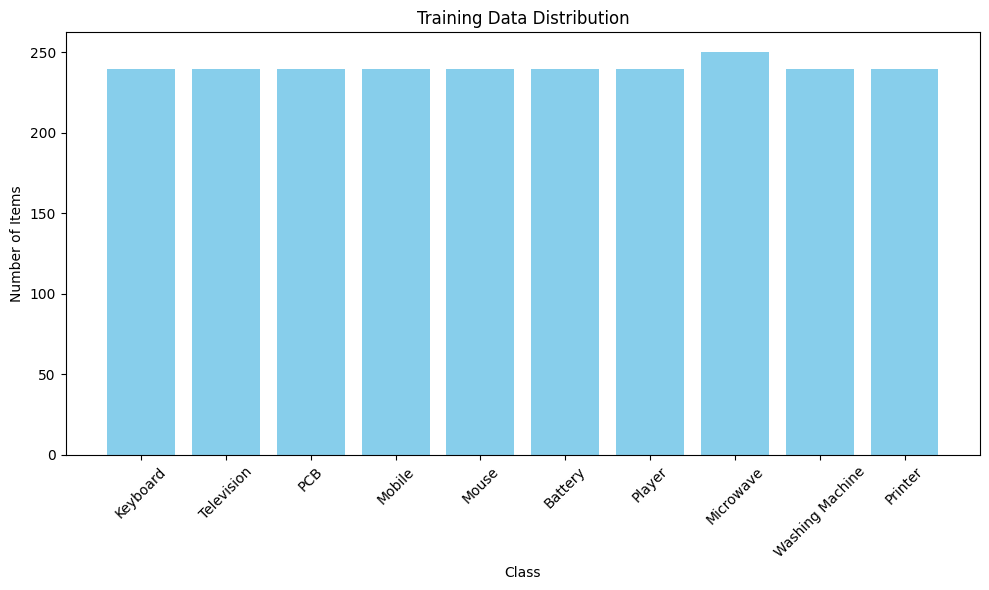

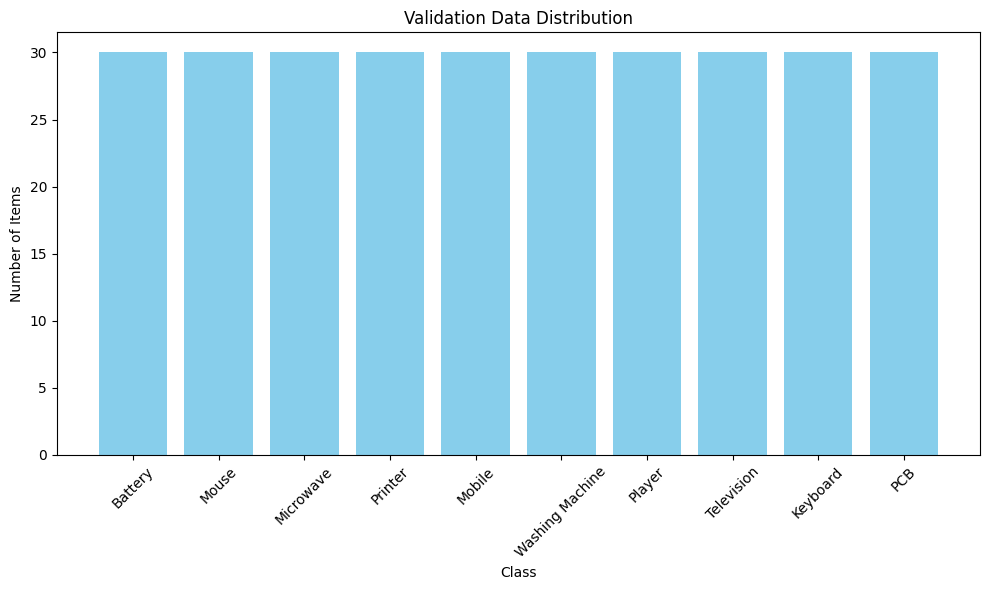

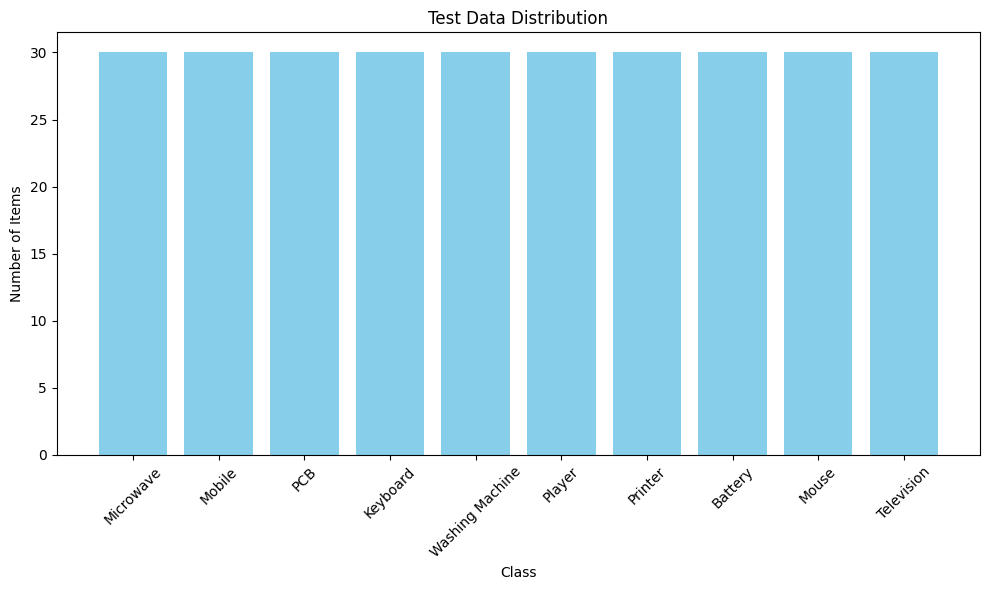

In [11]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")